In [1]:
from pandas import read_csv
import numpy as np
import pandas as pd

In [2]:
filename = 'dataset_pro.csv'
dataset = read_csv(filename)

In [3]:
names=['category','mva','nBJets','nJets','nLeptons','jetEta_0','jetEta_1','jetEta_2','jetEta_3','jetEta_4',\
      'jetMass_0','jetMass_1','jetMass_2','jetMass_3','jetMass_4','jetMassSoftDrop_0','jetMassSoftDrop_1',\
      'jetMassSoftDrop_2','jetMassSoftDrop_3','jetMassSoftDrop_4',\
       'jetPhi_0','jetPhi_1','jetPhi_2','jetPhi_3','jetPhi_4',\
      'jetPt_0','jetPt_1','jetPt_2','jetPt_3','jetPt_4','jetTau1_0','jetTau1_1','jetTau1_2','jetTau1_3','jetTau1_4',\
      'jetTau2_0','jetTau2_1','jetTau2_2','jetTau2_3','jetTau2_4','jetTau3_0','jetTau3_1','jetTau3_2',\
      'jetTau3_3','jetTau3_4','triggerBit_0','triggerBit_1','triggerBit_2','triggerBit_3','triggerBit_4',\
      'triggerBit_5','triggerBit_6','triggerBit_7','triggerBit_8','triggerBit_9','target']

In [4]:
dataset=dataset.drop('mva', axis=1)
dataset=dataset.drop('category', axis=1)
dataset=dataset.drop('nBJets', axis=1)

In [5]:
from pandas import read_csv
from matplotlib import pyplot
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost.sklearn import XGBClassifier  

In [6]:
array=dataset.values
X = array[:, :-11]
Y = array[:, -1]

LR: 0.689915 (0.009990)
LDA: 0.711365 (0.003626)
KNN: 0.645452 (0.003522)
CART: 0.656885 (0.002374)
GNB: 0.518452 (0.006372)
BgDT: 0.723631 (0.002844)
RF: 0.715650 (0.002659)
ET: 0.700703 (0.003769)
AB: 0.712431 (0.001807)
GB: 0.745461 (0.002936)


/usr/local/lib/python2.7/site-packages/sklearn/preprocessing/label.py:171: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/local/lib/python2.7/site-packages/sklearn/preprocessing/label.py:171: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/local/lib/python2.7/site-packages/sklearn/preprocessing/label.py:171: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/local/lib/python2.7/site-packages/sklearn/preprocessing/label.py:171: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this wi

XGB: 0.741502 (0.002455)


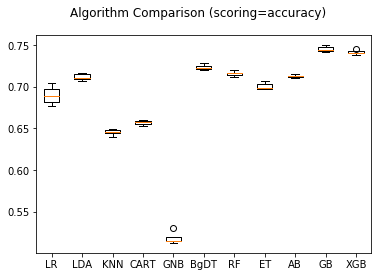

In [9]:
# Compare Algorithms
random_state=7
# prepare models
models = []
models.append(( 'LR' , LogisticRegression()))
models.append(( 'LDA' , LinearDiscriminantAnalysis()))
models.append(( 'KNN' , KNeighborsClassifier()))
models.append(( 'CART' , DecisionTreeClassifier()))
models.append(( 'GNB' , GaussianNB()))
models.append(('BgDT', BaggingClassifier(base_estimator=DecisionTreeClassifier(), random_state=random_state)))
models.append(('RF', RandomForestClassifier()))
models.append(('ET', ExtraTreesClassifier()))
models.append(('AB', AdaBoostClassifier(random_state=random_state)))
models.append(('GB', GradientBoostingClassifier(random_state=random_state)))
models.append(('XGB', XGBClassifier()))

#models.append(( 'SVM' , SVC()))

# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
  kfold = KFold(n_splits=5, random_state=7)
  cv_results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
  results.append(cv_results)
  names.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
  print(msg)
# boxplot algorithm comparison
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison (scoring=accuracy)')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

LR: 0.746363 (0.013935)
LDA: 0.781431 (0.002705)
KNN: 0.686829 (0.003965)
CART: 0.656642 (0.001973)
GNB: 0.701969 (0.004989)
BgDT: 0.792786 (0.002086)
RF: 0.785688 (0.002972)
ET: 0.765417 (0.003546)
AB: 0.787561 (0.001326)
GB: 0.822125 (0.002630)
XGB: 0.818354 (0.003048)


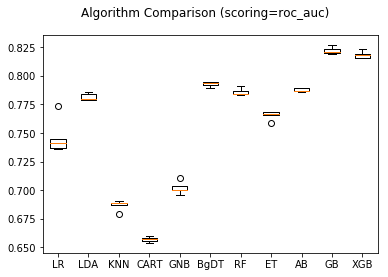

In [10]:
# Compare Algorithms
random_state=7
# prepare models
models = []
models.append(( 'LR' , LogisticRegression()))
models.append(( 'LDA' , LinearDiscriminantAnalysis()))
models.append(( 'KNN' , KNeighborsClassifier()))
models.append(( 'CART' , DecisionTreeClassifier()))
models.append(( 'GNB' , GaussianNB()))
models.append(('BgDT', BaggingClassifier(base_estimator=DecisionTreeClassifier(), random_state=random_state)))
models.append(('RF', RandomForestClassifier()))
models.append(('ET', ExtraTreesClassifier()))
models.append(('AB', AdaBoostClassifier(random_state=random_state)))
models.append(('GB', GradientBoostingClassifier(random_state=random_state)))
models.append(('XGB', XGBClassifier()))

#models.append(( 'SVM' , SVC()))

# evaluate each model in turn
results = []
names = []
scoring = 'roc_auc'
for name, model in models:
  kfold = KFold(n_splits=5, random_state=7)
  cv_results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
  results.append(cv_results)
  names.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
  print(msg)
# boxplot algorithm comparison
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison (scoring=roc_auc)')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

In [54]:
model=XGBClassifier(
    reg_lambda=40,
    learning_rate=0.05,
    n_estimators=1215,
    max_depth=4,
    min_child_weight=9,
    gamma=0.7,
    subsample=0.7,
    colsample_bytree=0.9,
    objective= 'binary:logistic',
    nthread=4,
    scale_pos_weight=1,
    seed=27)
results = cross_val_score(model, X, Y, cv=kfold, scoring='accuracy')
print("Accuracy", results.mean(), "dev_std", results.std())

/usr/local/lib/python2.7/site-packages/sklearn/preprocessing/label.py:171: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/local/lib/python2.7/site-packages/sklearn/preprocessing/label.py:171: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/local/lib/python2.7/site-packages/sklearn/preprocessing/label.py:171: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/local/lib/python2.7/site-packages/sklearn/preprocessing/label.py:171: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this wi

('Accuracy', 0.7728223022800726, 'dev_std', 0.0030145554390480483)


/usr/local/lib/python2.7/site-packages/sklearn/preprocessing/label.py:171: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [53]:
model= XGBClassifier(
    reg_lambda=40,
    learning_rate=0.05,
    n_estimators=1215,
    max_depth=4,
    min_child_weight=9,
    gamma=0.7,
    subsample=0.7,
    colsample_bytree=0.9,
    objective= 'binary:logistic',
    nthread=4,
    scale_pos_weight=1,
    seed=27)
results = cross_val_score(model, X, Y, cv=kfold, scoring='roc_auc')
print("AUC", results.mean(), "dev_std", results.std())

('AUC', 0.8527476221662404, 'dev_std', 0.002079814332480842)


In [51]:
# prepare models
models = []
#models.append(('XGB', XGBClassifier(seed=27)))
models.append(('XGB', XGBClassifier(learning_rate=0.05, n_estimators=1215, max_depth=4, seed=27)))
#models.append(('XGB', XGBClassifier(
#    reg_lambda=40,
#    learning_rate=0.05,
#    n_estimators=1215,
#    max_depth=4,
#    min_child_weight=9,
#    gamma=0.7,
#    subsample=0.7,
#    colsample_bytree=0.9,
#    objective= 'binary:logistic',
#    nthread=4,
#    scale_pos_weight=1,
#    seed=27)))
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
  kfold = KFold(n_splits=5, random_state=7)
  cv_results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
  results.append(cv_results)
  names.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
  print(msg)

/usr/local/lib/python2.7/site-packages/sklearn/preprocessing/label.py:171: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/local/lib/python2.7/site-packages/sklearn/preprocessing/label.py:171: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/local/lib/python2.7/site-packages/sklearn/preprocessing/label.py:171: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/local/lib/python2.7/site-packages/sklearn/preprocessing/label.py:171: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this wi

XGB: 0.769571 (0.002617)


/usr/local/lib/python2.7/site-packages/sklearn/preprocessing/label.py:171: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [52]:
# prepare models
models = []
#models.append(('XGB', XGBClassifier(seed=27)))
models.append(('XGB', XGBClassifier(learning_rate=0.05, n_estimators=1215, max_depth=4, seed=27)))
#models.append(('XGB', XGBClassifier(
#    reg_lambda=40,
#    learning_rate=0.05,
#    n_estimators=1215,
#    max_depth=4,
#    min_child_weight=9,
#    gamma=0.7,
#    subsample=0.7,
#    colsample_bytree=0.9,
#    objective= 'binary:logistic',
#    nthread=4,
#    scale_pos_weight=1,
#    seed=27)))
# evaluate each model in turn
results = []
names = []
scoring = 'roc_auc'
for name, model in models:
  kfold = KFold(n_splits=5, random_state=7)
  cv_results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
  results.append(cv_results)
  names.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
  print(msg)

XGB: 0.850372 (0.002342)
